# Natural Language Processing with Disaster Tweets (v1)

ML Sample of NLP.

## Dataset

Natural Language Processing with Disaster Tweets
- Predict which Tweets are about real disasters and which ones are not\
  https://www.kaggle.com/competitions/nlp-getting-started/overview


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Train Dataset
df_train = pd.read_csv("./raw_data/train.csv")

df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


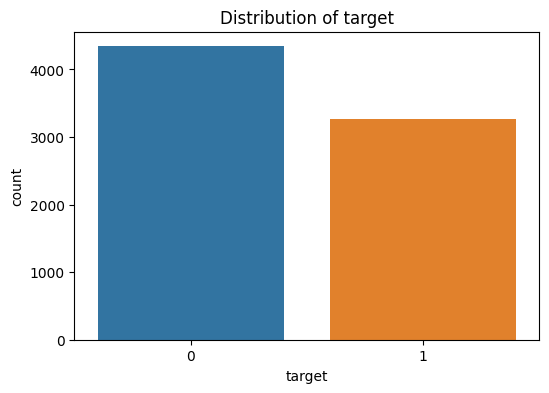

In [3]:
# Plot distribution of target
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_train, x='target'
)
plt.title('Distribution of target')
plt.show()

We see that there are more counts with target of 0 (no disaster) than with target of 1 (disaster tweets).

https://www.kaggle.com/competitions/nlp-getting-started/data
> What am I predicting?
>
> You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

In [4]:
df_train['keyword'].value_counts().head(10)

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: keyword, dtype: int64

In [5]:
df_train['location'].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [6]:
# Investigate missing values
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [7]:
# Methods preparation
def clean_text(text: str) -> str:
    """Clean text with remove hashtag, user name, and URL"""
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    return text


def fill_missing_keyword_and_location(df: pd.DataFrame) -> None:
    """Complete missing values in the 'keyword' and 'location' columns of a DataFrame"""
    df['keyword'].fillna('unknown_keyword', inplace=True)
    df['location'].fillna('unknown_location', inplace=True)


def evaluate_model(y_true_test, y_pred_test) -> None:
    """Evaluate the model using various metrics
    
    Args:
        y_true_test: True labels for the test data.
        y_pred_test: Predicted labels for the test data.
    """
    print("Accuracy:", accuracy_score(y_true_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_true_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_true_test, y_pred_test))


In [8]:
# Preprocessing: fill NaN
fill_missing_keyword_and_location(df_train)

df_train.head()

,id,keyword,location,text,target
0,1,unknown_keyword,unknown_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,unknown_keyword,unknown_location,Forest fire near La Ronge Sask. Canada,1
2,5,unknown_keyword,unknown_location,All residents asked to 'shelter in place' are ...,1
3,6,unknown_keyword,unknown_location,"13,000 people receive #wildfires evacuation or...",1
4,7,unknown_keyword,unknown_location,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# Preprocessing: clean text
df_train['text'] = df_train['text'].apply(clean_text)

df_train.head()

,id,keyword,location,text,target
0,1,unknown_keyword,unknown_location,Our Deeds are the Reason of this May ALLAH Fo...,1
1,4,unknown_keyword,unknown_location,Forest fire near La Ronge Sask. Canada,1
2,5,unknown_keyword,unknown_location,All residents asked to 'shelter in place' are ...,1
3,6,unknown_keyword,unknown_location,"13,000 people receive evacuation orders in Ca...",1
4,7,unknown_keyword,unknown_location,Just got sent this photo from Ruby as smoke f...,1


In [10]:
# Feature Engineering: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df_train['text'])
y = df_train['target']

In [11]:
# Model Building: split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [12]:
# Model Building: train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Model Evaluation
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy: 0.8030203545633617
Confusion Matrix:
 [[773 101]
 [199 450]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [14]:
# Load Test Dataset
df_test = pd.read_csv("./raw_data/test.csv")

df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
# Preprocessing: fill NaN and clean text
fill_missing_keyword_and_location(df_test)
df_test['text'] = df_test['text'].apply(clean_text)

df_test.head()

,id,keyword,location,text
0,0,unknown_keyword,unknown_location,Just happened a terrible car crash
1,2,unknown_keyword,unknown_location,"Heard about is different cities, stay safe ev..."
2,3,unknown_keyword,unknown_location,"there is a forest fire at spot pond, geese are..."
3,9,unknown_keyword,unknown_location,Apocalypse lighting.
4,11,unknown_keyword,unknown_location,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
# Feature Engineering: TF-IDF Vectorization
# - Since a fit (i.e., model training) has already been performed on the training data,
#   a transform is performed on the test data using the parameters learned on the training data,
#   rather than performing a new fit on the test data.
X_test_tfidf = vectorizer.transform(df_test['text'])

In [17]:
# Prediction
y_test_predicted = model.predict(X_test_tfidf)

In [18]:
df_v1 = pd.DataFrame({
    'id': df_test['id'],
    'target': y_test_predicted
})

df_v1

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [19]:
df_v1.to_csv(
    'v1_submission.csv',
    index=False
)

- Result
> Score: 0.7830